# Parallel vs. Serial Performance Analysis of Image Convolution
# 5/27/20

In [1]:
import math
import subprocess
import sys
import os
import timeit
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define input variables:

$P$ = array of file names

$N$ = array of number of threads

In [8]:
P = ["file1", "file2", "file3"]
N = [0,1,2,4,6,8]

In [3]:
#function that uses Windows Powershell terminal in order to execute our editor.go script in parallel or serial
def run_convolution(p, numThreads):
    filepath_editor = "C:\\Users\\eddie\\Documents\\MSCS\\ParallelProgramming\\eddieshim\\proj2\\editor\\{}\\".format(p)
    filepath_data = filepath_editor
    args = ""
    
    if numThreads > 0: 
        args = "-p={}".format(numThreads)        
        filepath_out = "C:\\Users\\eddie\\Documents\\MSCS\\ParallelProgramming\\eddieshim\\hw5\\output_parallel_{}.txt".format(p)
        
    command = "Get-Content {}{}.txt | {}editor.exe {}".format(filepath_data, p, filepath_editor, args)
    time_command = "Measure-Command{" +  command + "}  | Select-Object -Property TotalSeconds"
    process = subprocess.Popen(["powershell.exe", time_command], stdout = subprocess.PIPE, stderr = subprocess.STDOUT)
    terminal_output = str(process.communicate()[0])    
    exec_output = round(float(re.findall("\d+\.\d+", terminal_output)[0]), 2)
    return(exec_output)    

In [4]:
avg_times = []
sample_n = 5
for i in range(0,len(N)):
    n = N[i]
    avg_thread_time = 0
    for j in range(0, sample_n):
        single_time = run_convolution(p, n)
        print("Ran thread num =", n, "| single time =", single_time)
        avg_thread_time += single_time
    avg_thread_time = np.divide(avg_thread_time, sample_n)
    print("Ran thread num =", n, "| avg time =", avg_thread_time)
    avg_times.append(avg_thread_time)
        
print(avg_times)

Ran thread num = 0 | single time = 12.53
Ran thread num = 0 | avg time = 12.53
Ran thread num = 1 | single time = 13.6
Ran thread num = 1 | avg time = 13.6
Ran thread num = 2 | single time = 8.07
Ran thread num = 2 | avg time = 8.07
Ran thread num = 4 | single time = 6.42
Ran thread num = 4 | avg time = 6.42
Ran thread num = 6 | single time = 4.44
Ran thread num = 6 | avg time = 4.44
Ran thread num = 8 | single time = 4.42
Ran thread num = 8 | avg time = 4.42
[12.53, 13.6, 8.07, 6.42, 4.44, 4.42]


Defining speed up as:

$$speedup = \frac{\text{wall-clock time of serial execution}}{\text{wall-clock time of parallel execution}}$$

In [12]:
speedup_df = pd.DataFrame(columns = [P])
seq_time = avg_times[0]
speedup_times = []
for i in range(1,len(avg_times)):
     speedup_times.append(np.divide(seq_time, avg_times[i]))
speedup_df[p] = speedup_times
speedup_df.index = N[1:]
speedup_df.index.names = ["numThreads"]
print(speedup_df)
        

               file1     file2     file3
numThreads                              
1           0.921324  0.886246  0.691096
2           1.552664  1.291980  0.951588
4           1.951713  1.633052  1.553423
6           2.822072  2.350304  1.899950
8           2.834842  2.348519  1.936908


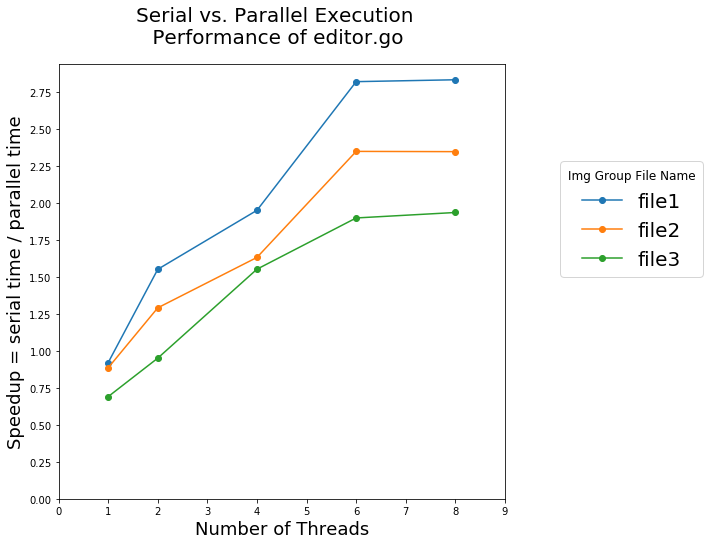

In [16]:
fig, ax = plt.subplots()
plt.plot("file1", data = speedup_df, marker = 'o')
plt.plot("file2", data = speedup_df, marker = 'o')
plt.plot("file3", data = speedup_df, marker = 'o')
plt.xlabel("Number of Threads", fontsize = 18)
plt.ylabel("Speedup = serial time / parallel time", fontsize = 18)
plt.yticks(np.arange(0, 3, .25))
plt.xticks(np.arange(0, 10, 1))
plt.suptitle("Serial vs. Parallel Execution\n Performance of editor.go", fontsize = 20)
plt.rcParams["figure.figsize"]=(8,8)
plt.legend(bbox_to_anchor = (1.1,.8), prop = {"size": 20}, title = "Img Group File Name")
plt.rcParams['legend.title_fontsize'] = 'large'
